In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
image_data = pd.read_csv('ecoli.csv')

In [3]:
X = image_data.values[:330, 0:6]
Y = image_data.values[:330, 7]

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [5]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
export_graphviz(clf_entropy, out_file="entropy.dot",class_names=["cp", "im", "imL", "imU", "imS", "om","pp","omL"], impurity=False, filled=True)

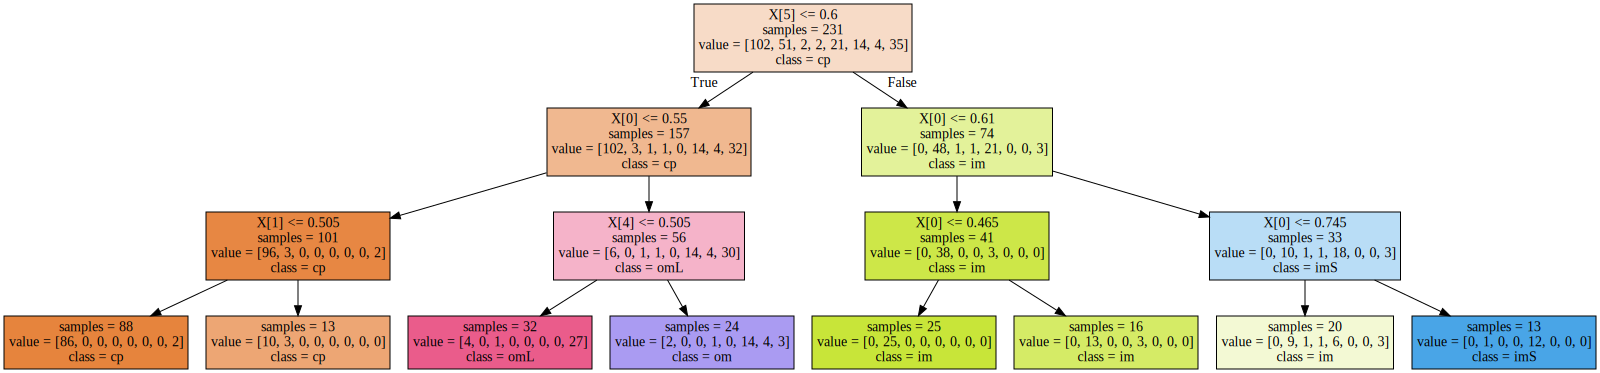

In [6]:
with open("entropy.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
y_pred_en_train = clf_entropy.predict(X_train)
y_pred_en_test = clf_entropy.predict(X_test)

In [8]:
print ("Accuracy on training set ", accuracy_score(y_train,y_pred_en_train)*100)
print ("Accuracy on test set ", accuracy_score(y_test,y_pred_en_test)*100)

('Accuracy on training set ', 84.848484848484844)
('Accuracy on test set ', 80.808080808080803)
